In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import sys

In [17]:
sys.path.insert(0, '/home/llr/cms/wind/cmssw/CMSSW_9_4_2/src/ZZAnalysis/AnalysisStep/test/Python/')

In [18]:
from trainlib.ConfigFileHandler import ConfigFileHandler
from trainlib.ConfigFileUtils import ConfigFileUtils

In [19]:
def convert_model_label(raw):
    retval = raw.replace('D_', '')
    retval = retval.replace('_ML', '')
    retval = retval.replace('_', '-')
    return retval

In [23]:
def make_input_plot(input_file):
    confhandler = ConfigFileHandler()
    confhandler.load_configuration(input_file)
    models = confhandler.get_sections()
    
    df = pd.DataFrame()

    for model in models:
        cur_sect = confhandler.get_section(model)

        used_nonperiodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["nonperiodic_columns"], lambda x: x))
        used_periodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["periodic_columns"], lambda x: x))

        used_vars = used_nonperiodic_vars + used_periodic_vars
        var_dict = {col: [1.0] for col in used_vars}
        var_dict["model"] = model

        row_df = pd.DataFrame.from_dict(var_dict)

        df = pd.concat([df, row_df], axis = 0)

    df = df.fillna(0.0)
    
    datacols = [col for col in df.columns if col is not "model"]
    plot_data = df[datacols].as_matrix()
    
    y_label = np.array(datacols)
    x_label = [convert_model_label(label) for label in df["model"].as_matrix()]
    
    fig = plt.figure(figsize = (12, 10))
    
    ax = fig.add_subplot(111)
    
    cax = ax.matshow(plot_data.transpose(), cmap = 'Blues', vmin = 0, vmax = 1)
    ax.set_xticklabels(np.concatenate([[''], x_label]), rotation = 'vertical')
    ax.set_yticklabels(np.concatenate([[''], y_label]))
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tight_layout()
    
    return fig

In [39]:
def make_fscore_plot(input_file):
    df = pd.DataFrame.from_csv(input_file)
    
    cols = [col for col in df["discriminant"]]
    
    df = df.loc[df["discriminant"].isin(cols)]
    
    df = df.fillna(0.0)
        
    # now plot the data contained in the table to have a global picture of the relevant input variables
    datacol_labels = [col for col in df.columns.tolist() if col != "discriminant"]
    variable_data = df[datacol_labels].as_matrix().transpose()
    datacol_labels = np.concatenate([[''], np.array(datacol_labels)])
    
    discriminant_labels = [convert_model_label(col) for col in df["discriminant"]]
    
    discriminant_labels = np.concatenate([[''], discriminant_labels])
    
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(variable_data, interpolation = 'nearest', cmap = 'Blues', vmin = np.min(variable_data), vmax = np.max(variable_data))
    ax.set_xticklabels(discriminant_labels, rotation = 'vertical')
    ax.set_yticklabels(datacol_labels)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tight_layout()
    
    return fig

In [24]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs.conf


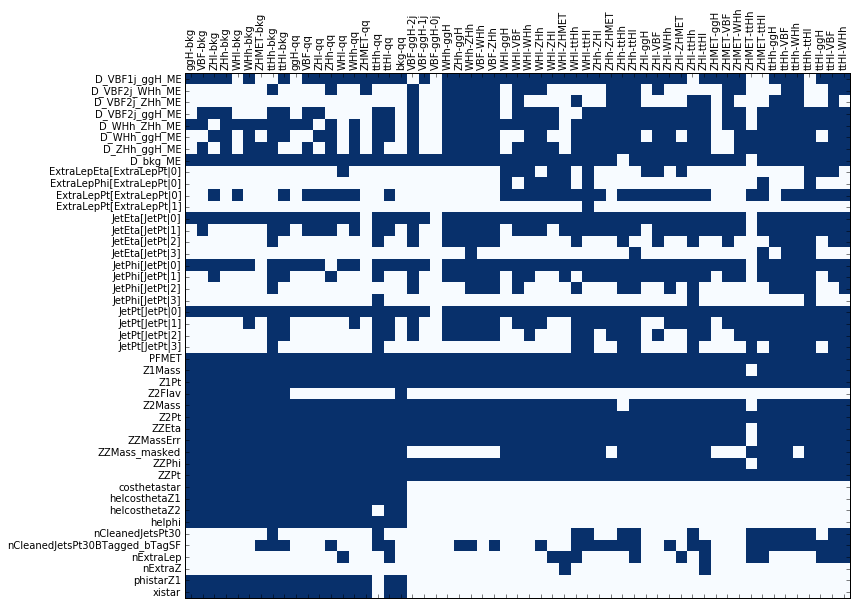

In [25]:
plt.show()

In [40]:
fig= make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_fscore_table.csv")

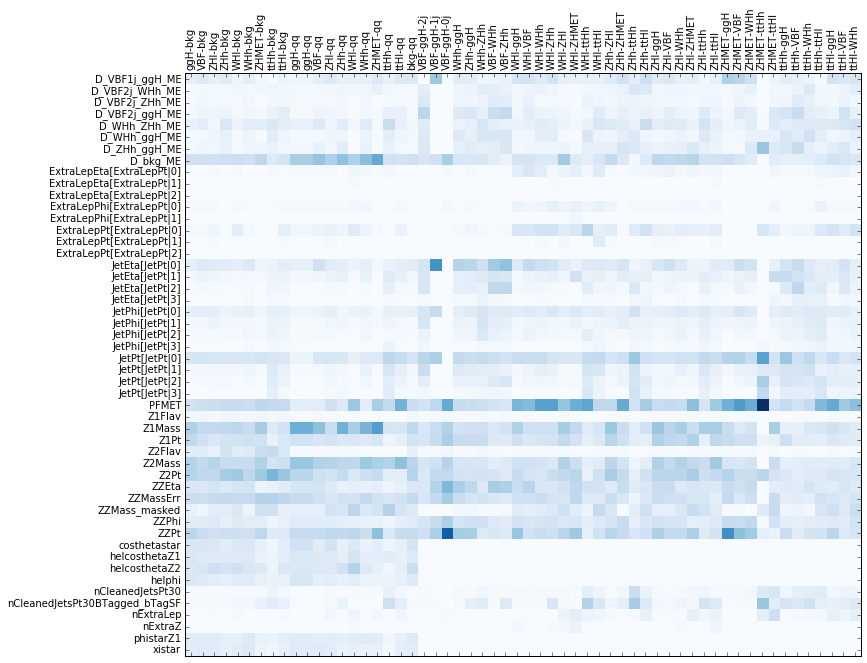

In [41]:
plt.show()